# Simple application of the nural network. The idea is taken from the Bishop book.



In my case, 2 features in the input, thus two input section and one is for the bias. I chose 4 hidden layer. I had used the soft max approach, so my output has two output section, one for the label 0 and one is for the other label 1.

$$a_1=W_1^T X+b_1$$
$$z_1=sig(a_1)$$
$$a_2=W_2^T+b_2$$
$$z_2=\frac{exp(a_2)}{(\sum (exp(a))}$$

$$\delta_2=(z_2-t) $$
$$\text{where t is 1-K coding and takes value 1 if present 0 otherwise: detail from the Bishop}$$

$$\frac{dE}{dW_2}=dW_2=z_1^T\delta_2 $$
$$\delta_1=\delta_2 W_2^T  sig'(a_1)$$

$$\frac{dE}{dW_1}=dW_2=X^T\delta_1 $$


use the gradient descent:
$$W=W-\epsilon dw$$
That is the simple formula.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

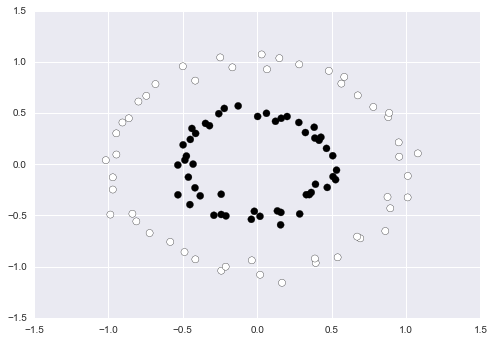

In [19]:
from sklearn.datasets import make_circles
X, y = make_circles(factor=0.5, random_state=0, noise=0.05)

# scatter plot of original and reduced data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()


In [111]:
n_input=2
n_hidden=10
n_output=2
epsilon=0.001
def sigmoid(x):
    return 1/(1+np.exp(-x))
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))


In [112]:
W1=np.random.rand(n_input,n_hidden)
b1=np.random.rand(n_hidden)
W2=np.random.rand(n_hidden,n_output)
b2=np.random.rand(n_output)


In [114]:
for i in range(500000):
    a1=np.dot(X,W1)+b1
    z1=sigmoid(a1)
    
    a2=np.dot(z1,W2)+b2
    z2=np.exp(a2)
    z2=z2/(np.sum(z2,axis=1,keepdims=True))
    
    loss=np.sum(-np.log(z2[range(len(X)),y]))
    
    if loss and i%10000==0:
        print 'iteration %i: %f' %(i,loss)
    
    delta2=z2
    delta2[range(len(X)),y]=delta2[range(len(X)),y]-1
    
    dW2=np.dot(z1.T,delta2)
    W2=W2-epsilon*dW2
    
    db2=np.sum(delta2,axis=0)
    b2=b2-epsilon*db2
    
    delta1=np.dot(delta2,W2.T)*d_sigmoid(a1)
    dW1=np.dot(X.T,delta1)
    W1=W1-epsilon*dW1
    
    db1=np.sum(delta1,axis=0)
    b1=b1-epsilon*db1
    
    
    

iteration 0: 0.194487
iteration 10000: 0.173910
iteration 20000: 0.157233
iteration 30000: 0.143449
iteration 40000: 0.131869
iteration 50000: 0.122003
iteration 60000: 0.113496
iteration 70000: 0.106087
iteration 80000: 0.099575
iteration 90000: 0.093805
iteration 100000: 0.088659
iteration 110000: 0.084039
iteration 120000: 0.079868
iteration 130000: 0.076085
iteration 140000: 0.072637
iteration 150000: 0.069482
iteration 160000: 0.066583
iteration 170000: 0.063912
iteration 180000: 0.061441
iteration 190000: 0.059150
iteration 200000: 0.057020
iteration 210000: 0.055033
iteration 220000: 0.053177
iteration 230000: 0.051438
iteration 240000: 0.049807
iteration 250000: 0.048273
iteration 260000: 0.046828
iteration 270000: 0.045464
iteration 280000: 0.044175
iteration 290000: 0.042955
iteration 300000: 0.041799
iteration 310000: 0.040701
iteration 320000: 0.039658
iteration 330000: 0.038665
iteration 340000: 0.037719
iteration 350000: 0.036817
iteration 360000: 0.035956
iteration 37000

In [115]:
def prediction(W1,W2, b1,b2,X):
    a1=np.dot(X,W1)+b1
    z1=sigmoid(a1)
    
    a2=np.dot(z1,W2)+b2
    z2=np.exp(a2)
    z2=z2/(np.sum(z2))
    return np.argmax(z2)


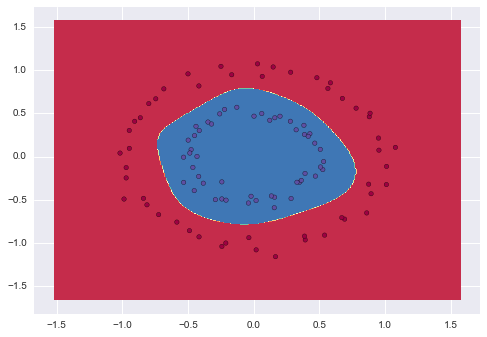

In [116]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = (np.c_[xx.ravel(), yy.ravel()])

m=Z.shape[0]
labels=[]
for i in range(m):
    myvalue=prediction(W1,W2, b1,b2,Z[i])
    if myvalue==1:
        label=1
    elif myvalue==0:
        label=0
    labels.append(label)
    
labels=np.array(labels)
labels=labels.reshape(xx.shape)
plt.contourf(xx, yy, labels, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAecAAAFRCAYAAABOnmU8AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3WlwXNWZP/7vvX17X9QtdWu1JK/Cmyxjm8UOYAwhYQsw2B4wUyYVUjWpyszwn0Amk+RFivlVEZhUoJJUhSpPJRQwNZNAMDMwAUJIsEnABhsvsi3vm2RLltRaWr2v9/xftC15lyV1973d/f28cqt1z33c6u7nnnPPeY4khBAgIiIi3ZC1DoCIiIguxORMRESkM0zOREREOsPkTEREpDNMzkRERDrD5ExERKQzitYBnOP3h/LWtsdjw/BwNG/tFwO+Bll8HbL4OvA1OIevQ5YWr4PP57zic2XRc1YUg9YhaI6vQRZfhyy+DnwNzuHrkKW316EskjMREVExYXImIiLSGSZnIiIinWFyJiIi0hkmZyIiIp1hciYiItIZJmciIiKdYXImIiLSGSZnIiIinWFyJiIi0hkmZyIiIp2RhBBC6yCA3G98ceSOdTltj4iIaM5Hv8lZW2W/8QUREVExYXImIiLSmSkl5/b2dqxfv/6Sn7/yyiu4//778fjjj+Pxxx/HyZMnp3IaIiKisqJM9sBf/epXePvtt2G32y95rqOjAz/5yU8wf/78KQVHRERUjibdc25ubsYvf/nLyz7X0dGBDRs24LHHHsN//Md/TDo4IiKicjTp5HzXXXfBYDBc9rn77rsP//Zv/4bXXnsNO3bswMcffzzpAImIiMrNpIe1r+brX/86HA4HAGDlypXYv38/Vq5cedVjPB4bFOXyyX4yjuSsJSIioqyrLX/KpSkn54uXSYfDYdx///14//33YbFY8Nlnn2HNmjXjtjM8HJ1qKERERHmVy5ocV0v0U07OkiQBAH7/+98jFoth7dq1eOqpp7B+/XqYzWYsX74ct91221RPQ0REVDZYIYyIiOgasUIYERFRmWJyJiIi0hkmZyIiIp1hciYiItIZJmciIiKdYXImIiLSGSZnIiIinWFyJiIi0hkmZyIiIp1hciYiItIZJmciIiKdYXImIiLSGSZnIiIinWFyJiIi0hkmZyIiIp1hciYiItIZJmciIiKdYXImIiLSGSZnIiIinWFyJiIi0hkmZyIiIp1hciYiItIZJmciIiKdYXImIiLSGSZnIiIinWFyJiIi0hkmZyIiIp1hciYiItIZJmciIiKdYXImIiLSGUXrAIhIO9sDAxiKJeEwK1jh8UGSJK1DIiKw50xUtjb5e5HuNmD6kAemHjP+0NejdUhEdBaTM1EBqUJAFULrMAAAwXAalbAAAFySCfGwPuIiIg5rExXM+73diIyogARUeRSs8tVpGo+QLkzGQp5YclaFwJbhfiQyKtoqPPCaLLkMj6issedMVABfBAZQNWhHa9qL1pQXst+IQ5ERTWOa53WhwziIIRHHQWUIc7z2az5WCIGNpzvh7LFhWr8bH5/040wimsdoicrLlJJze3s71q9ff8nPP/roI6xZswaPPvoofve7303lFEQlIZBMoQLm0cfVqg29iZiGEQHXOSrwlVk18MyQsGqWD62uyms+9lQiAm/QDouUHXxbmPJiz1AgX6ESlZ1JD2v/6le/wttvvw27/cKr7XQ6jeeffx5vvfUWzGYz1q1bhzvvvBOVldf+wScqNbMdDhwcCmJGxgUAOGIcxnKH9p8Jh8GIuXb3hI+TJQkZjA2DCyGggvesiXJl0j3n5uZm/PKXv7zk58eOHUNzczMcDgeMRiOWLl2K7du3TylIomI33eZEQ4MJh51DOOwcxLxpTvhMVq3DmrQGkw0hdxxBkURGqGi3+HGjt0rrsIhKxqR7znfddRe6u7sv+Xk4HIbT6Rx9bLfbEQqFJnsaopLR6vSg1enROoyckCQJD9U3YqdjCP5MDPe46uBSTJNqKy1UDKTiqFBMsMqco0oE5GG2tsPhQDgcHn0ciUTgcrnGPc7jsUFRDDmL40jOWiKiy5EkCUsrptZb9idi+PPpfnjjVgSVJGbUWHG9mz1w0i+fzzn+L+XAlJOzuGjN5qxZs9DZ2YlgMAiLxYLt27fjm9/85rjtDA9zpifljz8Rw87hYQDA0spKLvvRia3+QVwfr84+SAN7/H4srqhkpTLSLb8/dyPBV0v0U07O5z5Ev//97xGLxbB27Vr84Ac/wBNPPAEhBNauXYvq6uqpnoZo0gKpBDZ1+dGW9EEIgY9C/fjq9BpUGM3jH6yR7YEBDIQTEAaBVTW1JTvcK2cuTMKGjIwMBBQwOVN5k8TFXV+N5PJqBACO3LEup+1R8fpo4AzqeytGLySFEOipG8EdVdoWAbmSbYEBxHsk1AgbVCHQ7ujHI83NJdmb/HSwH+hV4IUVKaHiYMUA1jQ2ax0W0RXN+eg3OWsrrz1nIr2zGAyIIQPb2bd7DBlY5dzNb8i1gVACs0R2mZUsSXDETAiraTgNxryfe19wGAf6Q5BVCbAKPNAwDUY5f7WKvlRVjW2GAZyIDENWgAd9jXk7F1ExYXKmknez24eN4S74RuwQEjBYEcHD7iatw7oiYcjW35bP9pRjhnRBLiaSagYHekNYlPIBAFLJDD4y9eKrNfV5Pe+Nbi8w8aXWE7Y3NIxTgShUWeAGbxVqzMW7lI1KH5MzlTxZkrBmWhNO+sKQANxurtL1EPGt1dV4N9EDd8yCqCGFGT4bFCn/lXaDmRRc6bH78EbJADWli7teU3YoPIIzp5OYpWZHJDbH+vG1GQ2wGfgVSPrEdyaVBUmSMMNSmCUQU+VSTHh0ejOGM0nYZQXmAg3BexQzAuY4EM8ufQwgAZc1/0PphdAZjqJZHeuez4i7cTQWxCIdVGkjuhwmZyIdkiQJlUphZ5MbJAkrp/nwef8AZFWCw65gVVVtQWPIF6MiISEyMEvZC51hQxytRofGURFdGZMzEY2qNdvwYKNN6zBy7raqGvxPrAvmsBEpSUVVlYJ687XvwkVUaEzORFTyDJKENY3NiGRSUCT5mm8VCCHwl8F+xJIZeCxG3FTpy3OkRFncz5mIyobdYJzQPfx3e7vh6rVixrAHOGPEJv+ZPEZHNIbJmYjoCpJhwCZlJ8W5YUYonNE4IioXHNYmushAMo7dgWHIMnBLZTVMOi5YQvklDOoFj1W5NJaWkf6x50x0Hn8ihs2dfjT63ajpdeHNri6khTr+gVSSWrxOdBgH0Sui2GcawCJfAaqlEIE9Z6IL7AoMozXpBQAokoxZYQ8OREbQ6iiNfZhpYlpdHsy0O9CfiuMmkxsWjqJQgTA5ky4cj4ZwNBiCkICVvhpNvwTPL52ZhAo3v5DLzof9PQgHVQhJoKnKimVur9YhUZnhsDZp7lg0hAOnwmge9KDRX4G3OrUbSl5R5cVuWz8SIoOASKDPHUKL1aVJLKSNLwIDcPqtmJ+owoK4F/29KfQmud88FRZ7zqS5oyMhzE5nh40NkoxpERdOJSKalNt0KCY8PL0Ru4JDsBoMWO1o0mUd7uUvL8I/pxZO6tifr6jDltYXchxR6RhOpNCEsQIl9WkHumJR1JpKrzgL6ReTM2lPvnAoOSKnYDdo90Volg242a2vYhMr9j6N278fG/vBxsm3dfs7MeC+b1/y8/fUX2D3+/xKqLVa0CdFUCOyCfqUMYQVNtbgpsLiJ5E0d0uVD29Hu9EUcSEip2CoUlFtLN/t/Bbfk8bB7/0tnvrpeXWtz0/MeXKv/CRw39jj99RfAEDZJexWlwef1PTjUHAQQhKYU+VEldGidVhUZiQhhC4W7vn9oZy2d+SOdTltj/IrLVQcj4XgNBhRZy7P4cNLesc6smn1J6P/3vrEHg0jIdLWnI9+k7O2fL4r37pjcibS0PKXF0G64S78f1vOoP2d4llDu/n57MgG711TuSlUci6v8SoiHXl9w2P44UY3sDEGoHgSM4DRHn7bhsfw9ZY4rj9xlD1qohxiciYqIMumh/HqYUu2l/yO1tFMXfs7bjwFAKhF24bs7PHn/ve1srtPTZRr/AQRFcDie9LZCVc/1TqS/Dk3LH+v/CRe3NSL+Kq3NI6IqHgxOVNB7A0NozsUg5AFbq+ugVUuj7feuZnX954/87oMPPXT2tHlWpuftyL6vX8vi950ZyyMbb1DMKQkqBYVd9fXwaGYtA6LihAnhFHe7Q0Oob87jWmqE6oQ2O3oxyPNzaPrmkuRnmdea+ncrO9SvT/9u+OdWBSrBpBdu3/YM4gHGxo1jopyiRPCqGR0h+KYoWYrgMmShMqoFYPpBHwluHZ0dPiaifmyVm28JfuP+24pyaIncnqsIrIsSZBTpXsBSvnF2tqUd6qsQj1vgCZmSMNWgsPaK/Y+nU3MdE3ulZ+EZdPDsGx6WOtQciZjUnFuMDIhMlAsTM40ORzWprwLp5N451QPaqJ2hA1JVHmNuMVbrXVYOTPaW6Yp2fy8tejXTY+kEtjc2w85LUGxSrirpg6KxD5QKWERkilici68jwf6EAynoMoCS6srMc0ytnlARgj0pWJwGIxwGYwaRpk7r294rKgKhxSLUhzuptLBe85UVD4f8sPUZ0ILstsrbk368eBMC0xn90I2SBLqS2RXn9HJXiWwTlmPztX4bnsggEe+9d9ah0OkCY63UE4Mx1OoxNgEr6q4FX3J0psU9fqGxzgLu0Da33Hjh/d9G8tfXqR1KEQFx+RMOWE0SkiIzOjjgDGByhKajb1i79P44X3f1nwYO52IQs2kNI2h0FZtvAWvb3hM6zCICor3nCknMkLg/7pPQY1KUGWBOT4H2iqKfw9cvUz2UjMphD7/I6pQgYQaR7TaA2fLUq3DKrhS3nCjNxlFQs2g0ewo6RoAxY4TwqaIyZmmSk+FRIJ7/4r58hwYzk6mOz10APHFrTDaKjSOTDubVn9SMsVM3j3TDWVYgUk1oM8RxuqmJhhlDmzqESeEEWlg+cuL8M+phdnh6zwm5lR0BPH2rbBljEjIacjz2mDxXLnEpyEDGIxjs9ydJjeC0ZGyTs6rNt6CFzfNLvoa3kejQdiHzKiDHZAAX9iKvw724Q5fndahkYaYnInOGt3CsQDi+7ZjgXsZpLPDlwcOfgEsv0r97SofBvpOw+uYBiEEeuKnYPV8uSCx6tm5Gt7F3IsOplNwChNwdiTbKMlQVW1jIu1NKjkLIfDMM8/g0KFDMJlMePbZZ9HYOFY/9pVXXsGbb76JysrsPcf/9//+H6ZPn56TgIlyTYulUSZhGE3M2cdXX/ttb5yL/kwH/IP7kJFUmBffDLlE1ovnwqqNt6Btw8KiXHq1wOHGW9ZTuD5WDUmScEgZwhIX18+Xu0kl5z/96U9IJpP47W9/i/b2djz33HN46aWXRp/v6OjAT37yE8yfPz9ngRLlw+sbHsMPNbivnFAEMpkkDAYThFARlZNnV4hfmX36AmB6IaIrTu3vuNFehL1os2zAvc312DowAAhgkbsC06z28Q88K5BOIi1UVCnmCy74qLhNKjnv2LEDt956KwCgra0N+/btu+D5jo4ObNiwAX6/H7fffjv+/u//fuqREuVQoXvLkZ6jUP1noCoyXPNuhmPxbejY81dYUhIScga2xbcWJpCrEEIguPevsEYzyCADzJwDa3Wz1mFNWDH2oisUE+6urZ/wce+e6YYISFCEjLAzgYenNXGmd4mYVHIOh8NwOsdmmSmKAlVVIZ+dXXjffffh7/7u7+BwOPAP//AP+Pjjj7Fy5crcREw0RYXuLYe79sPXG0O1az7SmSQ6Pv8A7uX3ouL6VQAAc8Eiubrw4S8wRzTB6s5+to8e3gm1sg5yEe5HXKy96InYHw6gYsgKH7LLy2IjaWyx9eOWqhqNI6NcmFRydjgciEQio4/PT8wA8PWvfx0OhwMAsHLlSuzfv3/c5Ozx2KAohsmEc1lHctYSlYJzRSza33EXvOymPDCAatcCAIBiMMErXIgnolDMhS9nKoRAYqQPgARzRfUFw6ByNA6rdeyiu8pUjb7QIKyeyc0aTkVHAEDTGeXF2Iu+VkOpBNzCMTqRzCopGMhwJlm+XW35Uy5NKjkvWbIEmzZtwt13343du3ejpaVl9LlwOIz7778f77//PiwWCz777DOsWbNm3DaHh6OTCYXoqpa/vCi7h7CGdbAz51VOA4CkmoSsFH4ylxACI9s+QAOqAQh0S7tRccNXRhN02qIgnozAYsre7xxK+WFyXDep8wR3/Bm+VLYdvzEC19I7Nbsf2v6OGz97eVHJ9aBb7E78n+EMblGzw+GHlCEs5USyvMtlTY6cFyE5f7Y2ADz33HPo6OhALBbD2rVr8c477+C1116D2WzG8uXL8Y//+I/jtskiJPqWUDP4qL8XSAOVNhNuqvRpHdK49LJrVCI0CLV9GxrtsxFKDGLALcM598aCxxE8sgMtcR/MxmzSjCdDOGwfQsWsJQDOJtXdm2GPC6SQgZg+E7a6WeO2Gzl1EBjoR0ZkYJ27FLHe45gdqoDVnJ3iFk0EccwZhGtmW/7+c9fgxe/2Fv2a6HOEEHi9sxNN4QqcRBBxZFBdbcT91Y3jH0xTwgphU8TknFtvdJ7EwpAPBknGAGKQatNYUaXPPZlHe8s6kknFEfOfgtHhhtmlzYVNYP+nWCRdN9qDFULFHnEE7vkrJt1m9PRheM+E4XM2QwiB/QOfIe2pwCLDvPPOI7BHHJ7SeXKpFLakDGVS+PiwH3NUz+jPjrmGcG9jg4ZRlYdCJWfWh6NxJdQMTDEjDGc3jffCiuGIPjdfeH3DY7pLzABgMFrgqJ+jWWIGAFvTfBwb2j36+NjgbtibJ7bcUQiBVCwENZPOPh7og8+ZndEtSRIaLNMhOT04OTw2hHxyeA9sjXNz8D/IjXvlJ2HZ9LDWYUyJVTYgZkiPPhZCQDXoop9FOVLcl4+UF0IIRNQ0rLICgyTBJMlIGTJAZux5vX0R6OHest6ZHB7EFyzCvpMd2ceti2G2X/uwfyYZQ3j7n+GTqxDLRBCu9yEjA6qahixnv0oiqQCsvlYknVXo6NwHCECZOw8W55U3QRFqBulEBIrFWbD70k/9tBab9z5dtBtoKJKM6T4b9vUPwJExYdAWw33VE1+KRfrFYW26wEgqgfdPn4E9bkJcSWNujROtLg92BwZxtD8Ke9qIgCWOuxvr4DHqYxGQFveW1UwaoZN7AVmGq3khJDl3Kw30KrhrMxZYFkA+O4JyYmA3MktvRHTnX1Bj8CGejiDkc8B53Q3X3Gbk9CEYT3bCobgwnB6CcfFymBye8Q/MkWJfapVQMwhlUqhUzFzfXCDc+II08Zd+PxZHzi6xSQJ7+v1Y6HRjsbsK811uhNU03AaTLr4ItCi7CWS3bwxv/QPmVlwPIVQc2voHuJbfXfIJWhHyaGIGALvixEgmBdeKexGMjsBgtMBpmtge3srJk5jjXQYAqBUCHQd2wnTDnTmN+2qKfamVWTbAXOLvu3LFe850ATkjXTC0aEwbkD47uGKSDbq5Qn99w2OabecYPPQF5lfeCJPRCrPJjnkVi9G/848Y6diCaO8xTWIqBNXtwXCkF0B2Mll/uh9GuxuSJMFkd8MwwcQshIARY0vKJEmCUYP+Qvs7bvzwvm9j+cuLCn5uoithz5ku4LQpCIQScMMMVQgkrCld7SurVW/5QuoFPUj/0FFMN3tRbZiJwdOncSa0E845SzSMLz8cM1vRfXwPegP7kZYysC27HZI0+feGJEkIGhKj96wj8QCSdhOuNcWr6SQgyZANufka2zVjNoDiHeKm0sJ7znSJTwb7MRJNAQaBO2prYZX1cQ33w/u+ndf2hZqd8Tbe8HQ6HkFi22bM890IAeBQ18eY17xq9PnDw7thXl64odlipqaTCO/dAkXIyNhtcLQsHXdSmBACI198CE/SjIzIIOKxwrlgec5iKoWlVpQ/vOdMmrmlqhqo0jqKMaO95TwK7vkrHMEkACDkMsK16LYr/q5isQM33Ia9x9ohJAlWp/aFToqVrJjguv72CR0TOvIF5lrmwuzMFlMZDJ1Cv78LNl9TTmK6V34S793DBE3a0s94JdFFFt+Txg/v+3beE3Ooaz+aM9WY4V2MGd7FmJ6pQahr/1WPUaxOVCy8Be4FX0Kqxgt/qAsAMBA+jaS3cLONy1IiMVrlDABc1mqkggM5PcUPHno8p+0RTRSTM+nSir1P4175yYKcKxMehtMyNlTgtHqhhgPXfLxj1mIMNHnQrh5E/zRXSd5v1hNjTSPOjIxNvOsa2Q9b/ZycnuPcJLEVe5/OabtE14rjNqQri+9JZ5NyAWdiW+tmo/vQIUxzZ6tYnQ4chPm68WtKn89WMx22mul5iK48paJBxA7vggEypOp62OrH/h7W6mYMJxMI9O2DKlQo8xbAYs3PTkE7B07kpV2i8XBCWBk7FB7Bvv4gpIwEg03g/vppMGi8TEqrutjRM8eB7k4AQMJhhTkQggIFMYsEV9tKzXZUKkdqOoXY1j9invcmSJKEM4GjGJleDWvtDM1i4iQxOoe1tSmv0kLFnjMjWBjzYkGyCjOGPdjk79U0Ji3rYtvqZsK2bBWsS26D1R/APPcSzHEvwnWGmQgd+EyTmMpV1N+JZsec0QuiOvdspPtOaxrTvfKTXAdNBcXkXKYC6SRcqbHym2bJgFRSu43aLZse1sX2jsnoCDzGsfvPZqMdSlyfm3yUKsXqRDgxds8/o6ahytqPXPxzaqHWIVAZYXIuUx7FjIA5Pvo4LFKwWbQZtlux92k89dNaTc59MaPVhUB6aPRxMh1HysTyiIVkcdeg35HC6aH9GBg5iY7h7XDOu+majo2cOojozo8R2rEJiRzP4G5/x80JYlQwvOdcxk7HIviifwiSKsFik/GV6rqC31sdnQCmI7G+k8DxIzDCgIgJcC2ZWiUsmpxULAQ1lYDJWXnJ658MDyG5dzsswoi4nIJ50c1IjQyi8tQQalzZe9OH/NthvOn2CZcVHc/m561Fu5sVTV2h7jkzOZNmtJr8dT41k0K4/ROY0xIScga2hTdni4yQroU/+yMWuJcCyFYM2x/cBdVsxgLTdaPbV8biIzjmTcA5bV5eYuAksfLECWFEBRDa9RfMt8xHi6sVC+2LEG3/VOuQ6BpYxIUbZmSCwzANDqGnfy+Odf0VGTWNYHwQxjxuP2ldy/XslD9MzqSZ7EYD2rJmZBjO9rQkSYYtw55QMYjKKQiRncCYSEXhMDhxXcOtmFZ7PaY33IyO4x+g35WBxZ2/uQyrNt5SFPegexNRbBnuQ28yqnUoNAFMzqQJy6aHdTEJLIE0zr+zk5DSGkZD18rW9iXsC+/GkZE92Du8DW772HvJYDDCUNcE1/yb8x7H7d+PYfE9+n3P7AoMYueJETi77dh5fAS7Rwa1DomuEbsJVDbigT6kY2HYqpsgG7LDopaFN6Bjz2ewqUbEpTSU+Ys1jpKuhWKxw3XDXQAAr5pB36cfoBLZjS9Gon0QnsqCxXKv/CQ279XnJLGTQzHMz1QBEjAr48aBwUEsrtA6KroWTM5UFoJ7P0FNxAybyYXOo3+E5YaVUCwOGO1uGJffDQDgNLDiJMkGKItvxr5Du6HAgHSFE86Zhb0ffPv3Y3jvnrTuJojJl0z31cX8X7oGHNamgnt9w2MFHdJORobhDRtQ7Z4Jh82L+d4bET24o2Dnp/wzOSvhXHYHrMtWarbxiB6riFVUKPBL2Tr1fikKj8ukcUR0rZicqeAKXQksk4jBrNhGH0uSDAPf+mVDTacQ7j2GRNCf93NJZ4fa9eJ2by0c0wS6vAE4p8lY6a3ROiS6RvyGopJn8dTidKILqpqduNMdOAypdprGUVEhpKIjiG39I5p70nB1HEdwf37rpN/+/Rgsmx7O6zkmarGrCnfV1KHNxX3GiwmTM5U8SZLhvPmr2Jc5jH2J/QjNqINNwx2OqHBih3ZhnvcmOGxe1Hpmwz2cRDoRyes5n/ppre6Gt6n4MDlTWZAVEypab4Wz7VZYue9y2TAI6YKStGbFhkwyfpUjcmPVxlt0vcSK9I/JmYhKllRTj96R4wCyu1v1pnthchRmmdUPHnq8IOcpFJ1Uei4b+pr3TwUnhEAGAgo3dqASZGuYg2H5OAb79yMjS3De/NWCbe7S/o4bP9/7tC7XP0/EyVgY288MQUpJUM0qvtpQiwqjefwDaUqYnMvYwdAI2vsCMKUNSFoyuHdaHZwKl1pQabHVzQTqZl7ycyEEIFRIcv62BL39+zG8uOlhxFe9lbdz5Nv2M0NYFPMBAERKYHNfPx6c1qhxVKWPyblMCSGwpy+AxYlqAIAazn7ovtZQ+rOYY/2dECePwgADkh6XZutiSTuRroNQujphhglBOQ77DatgMOZ2a8lzXj1swSN5afnaqEKgJxmBSTag2mid8PGG9NhIgyRJkNOF3Va2XDE5l6kMBIzpsR6DLEmQyuBDl4qHYDpyDDOrsmU6h4NncObUQdgb52ocGRWKUDMwdnVhjncZAEBVM9i3bysqrl+Vl/O1v+NG+33f1mSLybRQsfFUF3whO1KSipRnEPfXTewCXLWoUJMCsiQhITJQLKX/PaEHvNFYphRJRsKShnp2kkdQJGG35W9473ybn5/41XuuxPu7UO8YW0blsddBHcp/cQrSj3QyCrvBMfpYlg0wqfn/Kjz4vb/N+zku9slgP+YHvWiAA9OFCxVDVhyIBCbUxt31dTjqGcJhxyB6vCP4Sk19nqKl8zE5lyhVCOwJD2F3cBDps1vrXey+afU46hnCUccQwjVR3F6g6kFbWl/Ai9/tLci5LiZb7DjavRV9g4cghEA8GYKwanexQIWnmB0YygyPzj6OxIeQdua/sroW65/TqoBJGrvodgkTgqnUhNpwKCZ8rWEavtY8DXfXNsBQoAl15Y7JuQRlhMAbpzoROykj1aXgd51dSKmXJmjn2Q/dfc0NWOWrK9gsVq0kggNQDh/G/OlfhsNWjfZjv8fh9HE45yzVOjQqIEmSYFlyCzqie3AwvA/HLcNwtiwryLlXbbyloAl6nsuFQ8oQgOw8kwMrMsfCAAAgAElEQVTWQbQ6WSmsGEzqBogQAs888wwOHToEk8mEZ599Fo2NY7P3PvroI7z00ktQFAWrV6/G2rVrcxYwjW/biB/XBatgk7J/3tawF1uG+7GySvv9k7WUPN6Bhd5sIrZbPaj3LkBg9oySvyihSxltFTAuvQMAUOhxk10zZgPYU5BzNVjsyDQJHAgMQ4XAV711sBk41agYTOqv9Kc//QnJZBK//e1v0d7ejueeew4vvfQSACCdTuP555/HW2+9BbPZjHXr1uHOO+9EZWXh9lctd2lVwHTeoIgCGWmVBQQu3i1PlmQINaNNLEQF0mR1oMnqGP8XSVcmNay9Y8cO3HrrrQCAtrY27Nu3b/S5Y8eOobm5GQ6HA0ajEUuXLsX27dtzEy1dk2XuKuyx+qEKASEE2i1+LPNUaR1WQanpJKKDp5FOREd/ZmxuwYmhdgBAIhVDt+iDuaJ69PnQwW1IbfkzUlv+jNCBzwseM5WHp35ai9c3PKZ1GKRzk+o5h8NhOJ3OsUYUBaqqQpblS56z2+0IhUJTj5SumVVW8LXmenw2NAAB4KueWlTorLjI3J+8AchP5qXt2MBpyAf3o85ch0DyCCJNdbA3zoWlsg6JBQr2nDoImE2oWHj36JB25MxR1IetqKycBQAIRHrR030Y9oaWvMRIRHQ1k+o5OxwORCJjO7ucS8znnguHw6PPRSIRuFyuKYZJE+VQTPhydT3uqq6HW4el9na/r2DT6k/y0rZ67CBavEvhdtZjetUiKF1do8+ZK3yoWPglVLTcAOm8kqWp4T5UOsaWiLjttUgFuMSK8qP9HbfutpYkfZlUz3nJkiXYtGkT7r77buzevRstLWO9i1mzZqGzsxPBYBAWiwXbt2/HN7/5zXHb9HhsUJTcrbM9krOWqNgo0oVva4M0/tvcXNOM3mPHUevKlnnsC52Eqbn0q6WRdp76aS02vbwIW58ozOQwyg2fzzn+L+XApJLzXXfdhU8//RSPPvooAOC5557D73//e8RiMaxduxY/+MEP8MQTT0AIgbVr16K6unqcFoHh4ei4v0N0LRJ2M8LxITgslUikYoiYMqgY5xhr1TQMhUcw0tsOSBLS1T44qpsLEi8RFQ+/P3e3aa+W6CWhk33AcvkfBoAjd6zLaXuUe8tfXoRVG2/JS9uho7sgh8PIGBU45990wRA20fnUdArh3R/DmjYgIaVhnHc9zC5vwc6/+Xlr0e9cVU7mfPSbnLV1teTMBW+kmdjvdgJyfpKzc/b1eWmXSk9o7ydYYGuFQc5+He7ftw3mFfcU7Pw7B04U7FxUPNidIM3sfl/Be+ovtA6DypwlJY0mZgCwqiboZECRyhiTMxGVtYQioKrp0ccxKVXQqnFa1Nwm/WNyJqKy5lj0JXSE9+DYcDv2B3ZCWVD4/b3/ObWw4OckfeM9ZyIqS9He40gOnoGxsgauG+8CUH5fiIFUAn/q7oOclJAxqril3oc6s03rsAjl914seyeiIezxByCrElxOI1YWaJvIK9n9voIf4yW8vuExtL/jLth5hRAItv8F9mgGKlQka2vgmNlasPOTtkJHd6E2IMHrmIuh7h70hHbA2VJ+u5Nt6u3DwrA3O4yfArac8WP19CatwyJwWLusRDNp7OwOYG7Yi5ZoFYx9RuwIDGgdFgDg6y3xgp4vdGwXZqMRsyrbMKfyerj7QkgE9fFaUP6ZBobhdWR30qt01MM8GNA4Im0Y0oYL7q9LKaYEveBfooycTkRQmxjbVL4KVgxEkxpGpB0pEoHNMlaapMpej8Rwr4YRkZbUcBDRbX9GbOC01qEUlklFWmT3eleFAMyX7vtO2mByLiO1JisGjLHRxxGRgtWcu5KpxUTyVCEQGUvGveGTsPoar3IElZJkdRX6g50AgMHASVRYfZjnWgzDwQPIpBIFj6f9HTdW7H264Oe9u64exyuHccg2iMPuQXy1vq7gMdDlsUJYmdk9MoRjA2FIqgzFIfC12mkFXTZyNYW+7xw6/AVMgQhUZCAap8NWN7Ng5ybtRfu7ENr9MVrcbXC7GgAAgdAZnJnphq1Km7rqm1Z/wlrbOscKYZQXiysqsbiiUuswLuvnK+pw+zux8X8xR5wtywp2LtIfW3UT0g2zYVXHPg+BpB8mBy/SSHtMzkRUlEKHd8DiD0CSBKIuG1wLV0y4Def8m3Bo5ybYQxIyyCDd1Ag7lxKRDjA5k26I7R8CyE+tbSotUX8XakZk+KoWAwCCUT9Ode6Ho3n+hNqRJBkVS+8EkP0y1N/O51SuOCGMdGPrE3tYa5uuSXKgB17H2H1hl82HTGj4ir+fCPoRPLkHqehIIcIjmjL2nInOo2ZSCO3cDHvKgBTSwOzrYOW+zrpjqZuBnoNH0eBuAQD4Q10wNl5+pnH4WDs8/iiabQ0407ML0ZnNsNXOKGS41+TF7/Zi6ypOBqMsJucyk1JV/HWwDxkVmF/hQoPFPv5BZSS0d0t2+0CDEQBw6NB2CF+Tbma0U5bFXYORhmGEevZAkoBUVSWctZefyGXq7Ud9VbZe9vTKVhzsagd0lpzbHgggvuotrcMgHWFyLiMZIfBmVxdawz4YJRnbRwahNgo0Wh1ah6YbpgxgsBhHHzsMDsSTMSicJKQ79sa5QONcAIDlKr8nX3T37uLHRHrEd2kZ6YyH0BB2wihl/+zzUlXYPxLUOKoL7X5fwY/ffUmz8yfNChKp6OjjETUIg8mqWTx0qYmWZojYFUTj2XvNw5EzSHpc+QiLKKfYcy4jJtmAhDRWw1oIARW6qEFzibYHAgUtSHKOa8FyHGr/KyxRFSlkYFy4jEPaOhHtPgL5xHGYoCBoSMKx7A4YjOPPr3a13YZjx3ZBinZDrvbB2cjtGUn/mJzLyDSzHbsrh9E3FIVDGHHIOoT7vPVah5U3Qs1AkidWnlSSZFQsXgkgP8tqYgOnke4+AVWW4Jh7wzUll3KWigUBSYIkGSAdOYjrarNrmVU1g459W+G6/vZx25AkCa7Zhd+jeSK+3hJHYbd+Ib1jci4z99dNw+GKEYTSKTzsaIR5gsmrUH5m3IdVk1zznI6HEd35FzhVC+JIQZ01Z8qlOdPxMFLRIMwV1ZANk/vYxPynYDvaiSbP/Gxy+fxDOFfcM+ELiHIghMDI9j+iOuOCmkmjb/gwat1zRp+XZQOMammMaLz43V5OBqNLMDmXoRZbxfi/pLGtT+zB5r134fbvT7ycZ7Tjcyz03ADp7L31Q8e+AKaQnENHd8HVF0Kl0Y3e5G4o16+AyT7xIfdM90k0ebJFMmTZgCbLTHQPnoLdN33SsZWq4NEduM4yDxZTdjWBy+rDidNbUOedD0mSEE0EkbJZUM6zARJqBqcTEXiNFlQoJq3DoRxjcqaSYxTKaGIGADOMkxriBrJD47YzA2jyZYdF3aIeHYd2wbRk1YTbUmUBIdTR2JKZCAxGfdY511wiMZqYAcBurYTDXo3Onm2Ip6NITauHc+5yDQPUVnc8gk9PD6Iu7sA+xY+GGjOWebwTbmcoFcdfev2QUhIki8C9dQ1QJM4T1gP+FUi3trS+gM3PT7xvlLIYEU9mdzkTQiAsJyY9dKymkzAZxhbqSJIERUzuY2NrWYr9A58jGhvGYLALZ8wRWNy1k2qr1FkaZqNreP/o486e7aivXoi66lYkqyrgWrCiJCbqbX7eOqkh7Z3+YbQlfKiWrJibqcSJgej4B13Gn7r7MHekCnNjVZg55MEHvT2Taodyjz1n0rXo9/4dkJ+c0DHOBctxpGMrTKEUklIatusnX6/bYLJiCEHUqWkYZAVD4R5kqibX21UsdtiWfxXH+0/AYPahour6ScdV6syeGkRmxbG/ex+EAJI1TkTVU8gYFbgW3ql1eDmTrSc/cfJF99sNqgxVCMgTvGAxJOTRixyjZIBa+K2s6QqYnKnkSJI0ukPR1YpTXCvnjV9Bx/7PoGQA+KomvLnC+WTFCGd9Sw6iKn226magREuntj0QwCPf+m9sfXdyx1c5TeiPRFEtbIiLNCS7OuHEDACqSQXSZ/8tBIRRn0sryxGTM+na7vcVtG3QZs3zObJiRMWiWzU7P9HFbq70YZdhECcjwzAaJTzgbZxUOytqvfis1w85LUM1q7i3rnSXVhYbJmfSvUe+9d/Ahsc0TdBEufTzFXXYMsU2rq+oAqa48KLBasfqGayvr0dMzlTWEoE+pI/sgwEKkk4rXHNv1DokKmHnhrO3THI4m8oHZ2tTUXjkW/+NtgcCOW1TzaSg7tuJ+c7FuM65EM2xCoSO7srpOYjO9zPjPq1DoCLB5ExF4+crLr9f72QlQgOoNo3dY3NZvZDD4Zyeg+ic99RfYOsT3K+Zrg2HtalsmWxujKQOoBLTAADpdAIZhderlHttDwSw+1v5+bo9k4hip38YEoCZbgfmOvRfAZDGx+RMRWNL6wvY9PIirNo4+XXL5zOYrIg01uHIqZ0wCBkhUxoVy76ck7aJztn8vBVbWvOzDWowncQnXQNYlPQBAI6HR2BukjHD5szL+ahwmJyprNmb5gFN8yCEgLsEKk5dSToRhRAZGC25+dIOd+5DJjQCo7cOttqpbSpSqgox+Wt/eATXJSqBs2/dmZkKHAsFmJxLAMfwqKhsfWLPpEp6jqcUSkFeSbD9rzB98QVsO/cgsO0DCDG1QhPBfZ+icciIRcpc+E6NIHRkJ6KDp5FJctPDczat/iS7BDDPfGYzBuSxzWFiIg0Lb82UBP4VadLSQtXkvFtaX8j5zO1SFe45gsZ0JRqrFqC+ci7mWucheGTHlNq0jcThsmY3WfA6m6AcP47aY0PA9i2Idh/ORdhFq+2BAH787ksFm/g1y+qC6k2jwzCIw/IwjrqHsKKyuiDnpvya1LB2IpHAv/zLv2BwcBAOhwPPP/88PB7PBb/z7LPPYufOnbDbswvcX3rpJTgcjqlHTJOSFiq2BwagQuCGCi9MU9hDuCsWxmc9gzCmDEiaMljZ4EOt2ZbDaMdXrIVJEsEBxLsOQSgKKlqW5X0v50x4GE5L0+hjs9EOKTm1AsoX97ttRic8rgZ40IBDnTuBhomVJ410HYChuxsGGBCrsMA1vzh3m9q0+hNNZmN/uboOCW8GaaHCbjAW/PyUH5PqOf/mN79BS0sL/uu//gsPPvggXnrp0skOHR0d+PWvf43XXnsNr732GhOzhtJCxRudnbB1W+HqtuPNzi4k1Myk29veO4S2eDXmZ6qwOFaNrb2DOYz22uV6aVWupOMRBHf8GfHtH2Nkz18hzo4wJIb7oOzdg0XKXMxPT8PI53+AqqqIDp5GdKBrysPNl2ObNhcnAmNra08HDsJUN2NKbcZ9bvhDnVCFilN9e2C3VY0+p2BiFxuJ0CCc3YO4znM9ZnsWoTnuQfhkca0FLnRv+XLMsoGJucRMKjnv2LEDt912GwDgtttuw9atWy94XgiBzs5O/OhHP8K6deuwcePGqUdKk/ZZwI+FYR8skgKTZEBbpBpbh/2Tbk/OyBc91uZ+7ZbWF7Bp9SeanPtqorv+goW2RbjOuRBzpRkI7f0UAJDsPISZVW0AAKNiwTRDA4Y//V/UHB9E3YkAgp+9DzGFi6bLMdpcUOe3Yl90L/ZH9yE8ox6WqnpEOvcj/tlHSH62CcGD2ybUprNlKQame7FXOoZ+WwIWa3bULJGKIWKe2AVGfOA0ahxjm1u4bD6IYPHcsijUvWUqP+MOa7/55pt49dVXL/iZ1+sd7Qnb7XaELyrcEI1GsX79enzjG99AOp3G448/jtbWVrS0cDceLQgBGDCWQGVIUKfQSxMWFem4CkWSkRAZGHKx9dMkbX1iD9o2LNTV8LZDNUM6u2G9yWiFOZhNuAICQojRyWeDw8cxv24JLKbszFpbqhIHj+5ERcsNOY3H7KmB2VMz+jg+0o+KMwE0uLMXCiPRfnR3HcjOXL9GNl8TbL7scPmJwzsgR3qQMSlwLVk1odgs3mno7z2IaZ65AIBg1A+pUj9/y8tpeyCAr7fEEV/11qR3lSIaz7jJec2aNVizZs0FP/unf/onRCIRAEAkEoHTeeG0favVivXr18NsNsNsNuPmm2/GwYMHr5qcPR4bFCV399+O5Kyl4nej24uNgS4sjlZDgoRd1n486G6YdHv31zfgT4ZeiCSgWCTcXa3tTjZ6u/+cQGr030IIJKUMzAAss1txeNc2zKm6HrFkGEMYwWzj2KYDRsUCkUrmLI5ofxeSA6dgqZ0JS+XYLYB4fxdmOceGtits1egaOTDp8zhblk76WLOzCsGGShzq3gUDZMQqrHBN1+c953NLo/AuwHnp5cvnK8wytUlNCFuyZAk+/vhjtLa24uOPP8ayZcsueP7EiRP4zne+g7fffhvpdBo7duzAww8/fNU2h4ejkwmFroFZNuDh6U3YOuSHgMCD7gbYlcnfnzLJBtxbN/nkng/P/e9ruFd+UuswsubMxcEjX8AsjIjKCVgWfwkAYHJUIn3DLdjbuR+yxwZvy2oc3bkVc6qWQpIkHBvcBdviZeM0fm1Ch3egZkSG13Edeo8cw1Dt8Og+1JbqRvQfOI56d/ZieSTaD7nKc7Xm8urcWnMA0Otd03wWEqHi4veHctbW1RK9JCYxCyUej+Nf//Vf4ff7YTKZ8MILL6CqqgqvvPIKmpubsWrVKrz88st47733YDQa8dBDD+GRRx65apu5/A8DwJE71uW0Pbqy0/EI9g4FAAlYVlkJnzn365CvhWXTw3jqp7WanPtyzh/CvpJkeBiJY3sBAKbp82Cu8OXk3Kktf8bsysWjjw+NtMNy0x2jj8Mn98F4pg+yJCHmshbtDOl8evG7vZj7kzew+33WaqIxcz76Tc7aynlyzgcm5+LUn4jh065BzE9mZ+zuMfvxlem1qFBMmsSzYu/TuP37sfF/scRdnJwPj+yB+aaJ3Q8uZ++pv2BSpssqVHLmu4+mZG8wMJqYAWBBvArtwSHcVqlND3ZL6wt47560foa4NRJz2zES7UOFrQYDoS4kvZUwax2Uzp2/Tnk3vxpJY3wH0pRYDDJiIg2rlH0rhZCCYwr3s3Nh9/sKXtzUq6sh7kJzzb8Zp08dROfIQRgb6+DMU/3rdDyC6P5tUGCAWuGCY9bi8Q/Skey95BcAgDOvSVc4rE1TogqBt053oSJohSoJxNwJPFjXqIta1YvZg84rIQRCn7yLhd6bIEkyApFedLvTcMxq0zq0q3rxu70AgPiqtzSOhIoRh7WpKMiShNXTmtCbjMEgS6g2ajMZ7HJ2v6/gx3hJdxPFSkU6FoRP8Y6u6Xbba3FmpEPjqC7vxe/2Yol3BqLf+3fsXsWvPdI/vktpyiRJQl2Ba2tPRHzVW7wPnQcGkw3RzFgBIlWoSCG3Fc6mou2BAH5m3IfY73Zi9yoFWwDwK4+KBd+pVBbYi849WTEi0lCDY6d3wqY4MJAZhH2Z9jPC31N/AQDY/S0F2cLC/Jqj4sN3LZUV9qJzyz6jFWrTPERSMTjNDs3mGpTTTOsT0RCOhcOwKgas8Ph0Mb+Dco8TwqhscU108Wp7IICfr6gbnWldLvaHAujqjmNGpgIRkUKXJ4CHGprGP5ByhhPCqCQJIfBnfy8SMRUZg8DK2mrNCpZwTXRxOTepa0vrC8C7OHsPubycCEQwO1MJALBLRoiQAQk1A3Oe9wWnwmNypoL6s78Xlf327BeLEPgg3YO/nT5ds3jO3YtesfdpAGBPWmc2P5+d/b+l9QXEyzQhn09IFw50qlBh4LB2SWJypoKKx1TYpWyREkmSoMQVZITQ/Avm3PDoj6G/Gt3lZvPzVojtH2LrE3uwhYVBLtDmdePz6ABakh4MyjG4KxUokjz+gVR0mJypoIQioAoB+Wwyzhgzmifmi52bNAYAP3jocd1sRVnKzm0yAQBbWov3a2nrkB9DoSRUg8AyX2XOlxg2WhxwzTBif2QETWYLZllzs1EK6Q8nhFFBhdNJvNd9Boa4DFVR0VbrQYvdpXVYV7X85UVYtfEWrcMoOaP7I5eInYFBhHuAGpFNyDvNfZhT7UCTxY5qk36K89DUcFeqKWJy1rdr2U5RjzjDe2raHgjguf99rSR3fPpDTw9mDI/ti31GRBBBCpIBqKpVcJOHvdxSwNnaVNKKMTED2XvTPz77b8umh/HqYQuHva+g7YHA6L9/ZtyXXYf8bumuQ1YUCQmRgVnKzpweRBwz4IJdNWLvoB83ecZpgOg8pfkpobKQUDM4EA7ApihosVUU/PzxVW/hEQCPAJztfda59cfR7/07dn9r7Otlq4YxFcrtvhq8nTgNKSojkEnAJ2xjkx/V4rwYJe0wOVNRCqeTeKezB9fFKtErpXDIcwpfq2/ULJ7zZ3svf3nR6M9L/V71i9/txfUnjo4+3vrEnrKtYa1IMlY3NiEjBLYP+ZHokwEBhEUKpiuPXhJdFu85U1H6oK8HTX736Kzv0whjziwrmiwOjSO71OKzM7+ta5cUfbLe/LwV0e/9++jjUrx3nCt7Q8M4E4nDbmKZzVLCe85EVyMwmpgBwCwMiKv62RHpfKMJ7P09+DH2jP68GPabPr9mNYCz6475tXEtWp0etLLHTJPETxkVpQXuCnwRHMS8VBXSQkWXI4ibrcVVY/hcdbLLKfTyrSsta9rKIiBEmuCwNhWt7ngEB0aCgAzcVlUNUxnWF359w2NXfb5Uly0RaYXD2kTjaLDY0WCxax2GpsYr4lGqy5aISh2LshIREekMkzMREZHOcMyLykZSzeBPfWcgkhIUi4Q7q2u5ow8R6RK/mahsvNvTjeZBD2aHK1Hnd+EPvT1ah0REdFlMzlQ+4vJoT9ksGZAp70qbRKRjTM5UNlSDetFjXawiJCK6BO85U9lYVluJz3v6YUwZkDJncFstt/CjMaFMCidjYdSZrPCaLFqHQ2WOyZnKRrPVgeZZDqRUFUaZg0bFLphOojMewTSLDR7FPKW2jkVCaO8OYFrShc+UYdTWGrHM7c1RpEQTx+RMZWe8xDyUimPbwBAAgbZKD+rMtsIERtfsYGgEB3tCqE858BfjAGbUWrGoonLS7e0bGMGClBeQgIqMCXsH/FjGbbpJQ0zOROcJpZP4sLMPbfHsLkJbQgO4rVmCz2zVOrQJ2zkyiJ6ROIQssMTrKalqagcGg5ifPptM02Z0DA5MKTlLF00/kFWOrJC2+A4kOs/u4DAWxr2j2/stTHmxJxjQOKqJ2x8KINCTwZxQJVpGqrDl9CCimbTWYeWMrF64/aIsprYdY5XThH4pCiC7/7LRycmCpC0mZ6Lz2BUFEYwlsYTIwGQovo/J6UgUDepYUf3muAvHY7ndXEZLLqeCQWTXwgVEHHHz1C48vlRVDVeDhM6qYcTr47i/dlouwiSaNA5rE53nemcl/sd9CsERCwxCRr8rjDWeZq3DmjCzIiMm0rBK2Y/4gCGGpaYKjaPKndu9Nfhl8BA8MSvsMKIibMHB8AjmOib/f2yrqARK5yWiIjelLsGHH36Ip59++rLPvfHGG1i9ejUeffRRbN68eSqnISoYSZLwNw2NuG6WDTNnm/G3jc0wSFMbMtXCrVU1OO4exn7DIPYY/aioNqDGVDoT2wKZJGYmK7BMqsY8yYOZmQqcGIloHRZRzky65/zss8/i008/xbx58y55bmBgAP/5n/+J//mf/0E8Hse6devwpS99CUajcUrBEhWCJElotDgKcq5gOon24DCcRiPaHJ7Re91TJUsSHp7WhLRQIUOCXIQXGFdjkgxISRcVlbl4VhdREZt0z3nJkiV45plnLvvcnj17sHTpUiiKAofDgenTp+PQoUOTPRVRSfInYnj/xBlU9jgQ75Lxf2dO5/wciiSXXGIGALtBgb1SxikphLBIYbe5HzdWTX62NpHejNtzfvPNN/Hqq69e8LPnnnsO99xzD7Zt23bZY8LhMJzOsckoNpsNoVDpTEYhyoUvhoawOFkNSIAHZowEEuj3xVBtLL5lW1r4cnUdTjpDGEol8TV7A2wGTqGh0jHuu3nNmjVYs2bNhBp1OBwIh8OjjyORCFwu11WP8XhsUBTDhM5zNUdy1hJRfkgXLf8xCAkpVb3Cb9PlTLc6MZ3XMlRAPp9z/F/Kgbxcai5atAg/+9nPkEwmkUgkcPz4ccyZM+eqxwwPR/MRCpFuCCHwQV8PoiEVQgJsTgn7jYOYn6pCTKQxXBFDvYn1von0zO/P3Sjw1RJ9TpPzK6+8gubmZqxatQrr16/HY489BiEEnnrqKZhMplyeiqjobAsMoHLQgRnIfhaOpQKY02jGqWgAZkXGak9TziaEEVFxk4QQupjimMurEQA4cse6nLZHNFV/7D2D5sGxgs1RkYLalMJSV5WGURHRRMz56Dc5a+tqPefiK31EVKTq7Bb0SmNrcTtNQcy0FmbJ1sViahof9PXgg94enIxysiaR3nB6I1GBtDo92Frrx+HgIFQJmFflhMc4ta0OJyMtVPxv52ksjlRDliTsGxmGaARm2Aoz0YWIxsfkTFRAyyt9gMbLcY/HQmiMuEbXP89Je3AkOMzkTKQjHNYmKjN2g4KonBp9rAqBKW7qREQ5xuRMVGYazHZkKtPolIIYEDHssvfhNl+11mER0Xk4rE1Uhu6pbUC3J4JIJo2brM1QJF6nE+kJkzNRmWow27UOgYiugMmZiKYkLVR82HcGmQRgMGdrXhtl9sSJpoKfICKakvd6utE4UIE54Uo0DlTgvTPdWodEVPSYnIloSkRcglHKblpjlAxAnFO/iaaKyZmIpkRVLqwArBq4sxbRVPGeMxFNyU01Vfgk0w8laUDKlMEttV6tQyIqekzORDQl9RYb/nZmM9JC5ZIsohzhJ4mIcoKJmSh3+GkiIiLSGSZnIiIinWFyJiIi0hkmZyIiIp1hciYiItIZJmciIiKdYXImIiLSGSZnIiIinWFyJiIi0hkmZyIiIp1hciYiItIZJmciIr9O6oMAAAcNSURBVCKdYXImIiLSGSZnIiIinWFyJiIi0hkmZyIiIp1hciYiItIZJmciIiKdYXImIiLSGSZnIiIinWFyJiIi0hllKgd/+OGH+MMf/oAXXnjhkueeffZZ7Ny5E3a7HQDw0ksvweFwTOV0REREZWHSyfnZZ5/Fp59+innz5l32+Y6ODvz617+G2+2edHBERETlaNLD2kuWLMEzzzxz2eeEEOjs7MSPfvQjrFu3Dhs3bpzsaYiIiMrOuD3nN998E6+++uoFP3vuuedwzz33YNu2bZc9JhqNYv369fjGN76BdDqNxx9/HK2trWhpaclN1ERERCVs3OS8Zs0arFmzZkKNWq1WrF+/HmazGWazGTfffDMOHjx41eTs8digKIYJnedqjuSsJSIioiyfz1mQ80xpQtiVnDhxAt/5znfw9ttvI51OY8eOHXj44YeveszwcDQfoRAREeWM3x/KWVtXS/Q5Tc6vvPIKmpubsWrVKjz00ENYu3YtjEYj/uZv/gazZs3K5amIiIhKliSEEFoHAeT2agQAjtyxLqftERERzfnoNzlr62o9ZxYhISIi0hkmZyIiIp1hciYiItIZJmciIiKdYXImIiLSGSZnIiIinWFyJiIi0hkmZyIiIp1hciYiItIZJmciIiKdKdnynefz+Zx5bb8Y8DXI4uuQxdeBr8E5fB2ytHgdWL6TiIioiDA5ExER6QyTMxERkc4wORMREekMkzMREZHOMDkTERHpDJMzERGRzjA5ExER6QyTMxERkc4wORMREekMkzMREZHOMDkTERHpDJMzERGRzuhmVyoiIiLKYs+ZiIhIZ5iciYiIdIbJmYiISGeYnImIiHSGyZmIiEhnmJyJiIh0pmST84cffoinn376ss89++yzWL16NR5//HE8/vjjCIfDBY6ucK72OrzxxhtYvXo1Hn30UWzevLmwgf3/7d09LHNtGAfwP2k19DCJtRJhER/BwKCNoYM4A9FGP1LCIiIMjQQLhiYmkxgwYMbGYpB0EKI5SYkKg49GTCIS9RGtuN7hiUZVK8/z6jnH6fXb3Hcb17nuf3q1h6QyeXl5wfDwMNxuN/r7+3F3d5f0GK3mgYgwOTkJh8OB7u5uXF1dJexvb2/DZrPB4XBgdXVVoSoz77s+LC8vQxTF+PlfXl4qU6gMDg4O4PF4ktazJQvvUvVBVVkgDfL5fNTa2kper/fLfafTSXd3dzJXJb90fbi5uSFRFCkWi1EkEiFRFCkajSpQZWYtLS3R7OwsERFtbm6Sz+dLeoxW87C1tUVjY2NERBQMBmlgYCC+F4vFyGq1UiQSoWg0Sp2dnXR7e6tUqRmVrg9ERCMjIxQKhZQoTVaLi4skiiJ1dXUlrGdTFohS94FIXVnQ5Cfnuro6TE1NfblHRAiHw5iYmIDT6cT6+rq8xckoXR8ODw9RX18PnU4HQRBQWlqK09NTeQuUgSRJMJvNAACz2Yzd3d2EfS3nQZIkNDc3AwBqampwdHQU3zs7O4PJZIIgCNDr9aivr0cgEFCq1IxK1wcACIVCmJ+fh8vlwsLCghIlysJkMmFubi5pPZuyAKTuA6CuLOgU/e3/09raGlZWVhLWpqen0draiv39/S+f8/T0BI/Hg97eXry+vqK7uxtVVVWoqKiQo+SM+Jc+PDw8oLCwMP5zQUEBIpFIRuvMtK/6UFxcDEEQAABGozHplrUW8/Du8xnrdDq8vb0hNzc3ac9oNP76808lXR8AoK2tDW63G4IgYHBwEH6/HxaLRalyM8ZqteL6+jppPZuyAKTuA6CuLPzq4Wyz2WCz2f7qOfn5+fB4PDAYDDAYDGhsbMTJycmvfjH+lz4IgpAwqB4fH1FUVPTTpcnqqz4MDQ3h8fERwJ9r/PgiBGgzD+8EQYhfO4CEgaTF808lXR8AoKenJ/4GzmKx4Pj4WJPDOZVsysJ31JQFTd7WTufi4gJOpxNEhFgsBkmSUFlZqXRZsquuroYkSYhGo4hEIjg/P0d5ebnSZf24uro6+P1+AIDf70dDQ0PCvpbz8PHag8FgwhuOsrIyhMNh3N/fIxqNIhAIoLa2VqlSMypdHx4eHiCKIp6fn0FE2Nvb08z5p0Kfvk4hm7Lw0ec+qC0Lv/qT899YXl6GyWRCS0sL2tvbYbfbodfr0dHRgbKyMqXLk83HPng8HrhcLhARvF4v8vLylC7vxzmdToyOjsLlciEvLw8zMzMAsiMPVqsVOzs7cDgcAP78qWNjYwPPz8+w2+0YHx9HX18fiAh2ux0lJSUKV5wZ3/XB6/XG7540NTXF/0dBq3JycgAgK7Pw0Vd9UFMW+FupGGOMMZXJutvajDHGmNrxcGaMMcZUhoczY4wxpjI8nBljjDGV4eHMGGOMqQwPZ8YYY0xleDgzxhhjKsPDmTHGGFOZ/wDD4uOPulT7BwAAAABJRU5ErkJggg==cm.Spectral)
plt.show()